# Business Context
This analysis is conducted for a retail business to understand customer purchasing behavior, identify high-value customer segments, analyze sales trends across time, and evaluate product category performance.

The objective is to support marketing optimization, inventory planning, and pricing strategy decisions using historical transaction data.

# Stakeholder & Decisions
**Primary Stakeholders:**
* Sales Manager
* Marketing Team
* Inventory Planning Team

**Key Business Decisions Supported:**
* Which customer segments to target
* When to increase or reduce inventory
* Which product categories to prioritize
* Whether customers are price-sensitive or premium-oriented


# Data Overview
* **Number of Rows:** 1000
* **Number of Columns:** 9
* **What each row represents:** Each row represents a single retail transaction made by a customer on a specific date. 

# Executive Summary: Retail Sales Analysis

This analysis of our 1000 retail transactions revealed several key insights for driving revenue and customer engagement.

**Top 3 Key Findings:**

1.  **Electronics is a "Premium" Driver, Clothing is a "Volume" Driver:** Electronics generates the most revenue ($\$157k$) despite selling fewer items (849) than Clothing (894 items, $\$156k$ revenue). This shows a clear price-point difference and suggests we should market them differently.
2.  **No Seasonal Change in Product Preference:** Customer preference for Electronics, Clothing, and Beauty remains stable all year. Our sales dips (e.g., September) and peaks (e.g., May) are market-wide, not driven by a changing interest in our products.
3.  **"Bulk" Purchases are for Low-Value Items:** We found that as a customer's cart size (Quantity) increases, the *average price per item* goes down. This indicates "bulk" purchases are for stocking up on low-cost goods, not high-value shopping sprees.

**Key Recommendations:**
* Develop a loyalty program for our Top 10 VIP customers (led by Customer #1399 and #1463).
* Target "Young Adult" (18-29) demographic, as they have the highest average spend per transaction.
* Focus marketing on volume for Clothing/Beauty and premium value for Electronics.

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## Loading Datasets

In [2]:
df = pd.read_csv(r"C:\Users\Digvijay Patil\Downloads\retail_sales_dataset.csv")

# 4.1 Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34,Beauty,3,50,150
1,2,2/27/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,1/13/2023,CUST003,Male,50,Electronics,1,30,30
3,4,5/21/2023,CUST004,Male,37,Clothing,1,500,500
4,5,5/6/2023,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [6]:
df.drop_duplicates(inplace = True)

From this we can say that there is not any missing values

# Data Overview & Quality Insights

**Insights**

* The dataset contains transaction-level retail data, where each row represents a single customer purchase.
* The data spans multiple months, enabling time-based trend and seasonality analysis.
* No critical missing values were found in revenue-driving columns (Price, Quantity, Total Amount).
* Customer demographic attributes (Age, Gender) are sufficiently populated to enable segmentation.

**Why it matters**

* Confirms data reliability for business analysis.

* Validates that customer segmentation and trend analysis are feasible.

**Decision Supported**

* Confident use of data for marketing and inventory planning.

# Data Quality Checks & Assumptions
* **Missing values:** 0 
* **Duplicate records:** 0
* **Assumptions you are making:** It is assumed that customer age and gender information is accurate and that the dataset represents genuine completed transactions.

# Feature Engineering

* **Why extracting month/year matters:** 
Month and year were extracted from the transaction date to enable time-based analysis such as monthly trends, seasonal patterns, and year-over-year comparisons, which are essential for inventory planning and sales forecasting.

* **Why grouping ages matters:**
Customer ages were grouped into defined age segments to represent meaningful customer categories. This allows clearer identification of high-value customer segments and supports targeted marketing and strategic decision-making.

In [7]:
df['Date']=pd.to_datetime(df['Date'])
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [8]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Day,Month,Year
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,24,11,2023
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,27,2,2023
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,13,1,2023
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,21,5,2023
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,6,5,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,16,5,2023
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,17,11,2023
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,29,10,2023
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,5,12,2023


In [9]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount,Day,Month,Year
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000,15.310000,6.549000,2023.002000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000,1.000000,1.000000,2023.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000,7.000000,4.000000,2023.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000,15.000000,6.000000,2023.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000,23.000000,10.000000,2023.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000,31.000000,12.000000,2024.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632,8.871674,3.452755,0.044699


In [10]:
season_map = {
    1: 'Winter', 
    2: 'Winter',
    3: 'Summer',
    4: 'Summer',
    5: 'Summer',
    6: 'Monsoon',
    7: 'Monsoon',
    8: 'Monsoon',
    9: 'Monsoon',
    10: 'Post-Monsoon',
    11: 'Post-Monsoon',
    12: 'Winter'
}

In [11]:
df['Season'] = df['Month'].map(season_map)
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Day,Month,Year,Season
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,24,11,2023,Post-Monsoon
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,27,2,2023,Winter
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,13,1,2023,Winter
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,21,5,2023,Summer
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,6,5,2023,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,16,5,2023,Summer
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,17,11,2023,Post-Monsoon
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,29,10,2023,Post-Monsoon
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,5,12,2023,Winter


# Feature Engineering Insights

**Insights**

* Extracting Month and Year enables identification of sales trends and seasonal patterns.

* Grouping customer ages into segments simplifies customer behavior analysis and aligns with business-defined customer personas.

* Derived features improve interpretability without altering raw data integrity.

**Why it matters**

* Businesses operate on periods and segments, not raw values.

* Simplifies complex data into actionable insights.

**Decision Supported** 

* Time-based sales planning and customer targeting strategies.

# 4.2 Exploratory Data Analysis (EDA)

In [12]:
df.groupby('Gender')['Total Amount'].mean() 

Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64

In [13]:
df.groupby('Gender')['Total Amount'].sum() 

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

In [14]:
df.groupby('Gender')['Total Amount'].count() 

Gender
Female    510
Male      490
Name: Total Amount, dtype: int64

In [15]:
gender_spending_summary = df.groupby('Gender')['Total Amount'].agg(
    transaction_count='count',
    total_revenue='sum',
    average_spending='mean'
)
print(gender_spending_summary)

        transaction_count  total_revenue  average_spending
Gender                                                    
Female                510         232840        456.549020
Male                  490         223160        455.428571


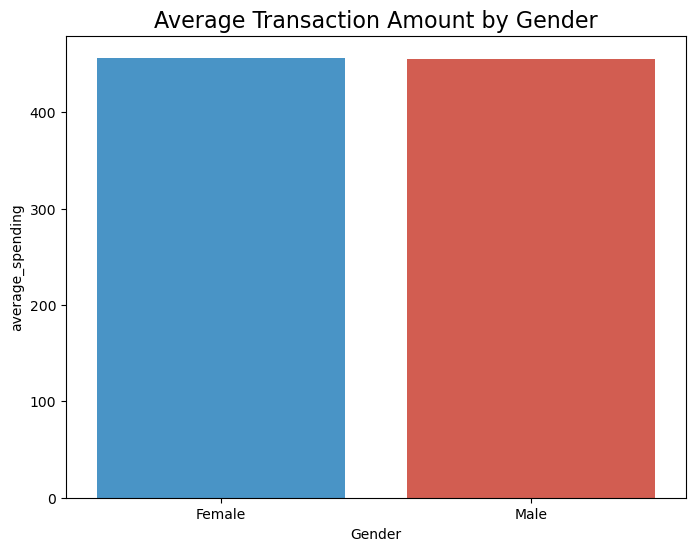

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_spending_summary,x='Gender',y='average_spending',palette=['#3498db', '#e74c3c'])
plt.title('Average Transaction Amount by Gender', fontsize=16)
plt.show()

Analysis shows that, on average, there is no significant difference in the amount spent per transaction between male and female customers.

In [17]:
def categorize_age(age):
    if age >= 18 and age <= 29:
        return 'Young Adult (18-29)'
    elif age >= 30 and age <= 45:
        return 'Adult (30-45)'
    elif age >= 46 and age <= 60:
        return 'Middle-Aged (46-60)'
    elif age >= 61:
        return 'Senior (61+)'

In [18]:
df['Age Group'] = df['Age'].apply(categorize_age)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Day,Month,Year,Season,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,24,11,2023,Post-Monsoon,Adult (30-45)
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,27,2,2023,Winter,Young Adult (18-29)
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,13,1,2023,Winter,Middle-Aged (46-60)
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,21,5,2023,Summer,Adult (30-45)
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,6,5,2023,Summer,Adult (30-45)


In [19]:
age_group_spending = df.groupby('Age Group')['Total Amount'].mean().reset_index()
age_group_spending

,Age Group,Total Amount
0,Adult (30-45),466.907692
1,Middle-Aged (46-60),446.752266
2,Senior (61+),357.258065
3,Young Adult (18-29),490.657371


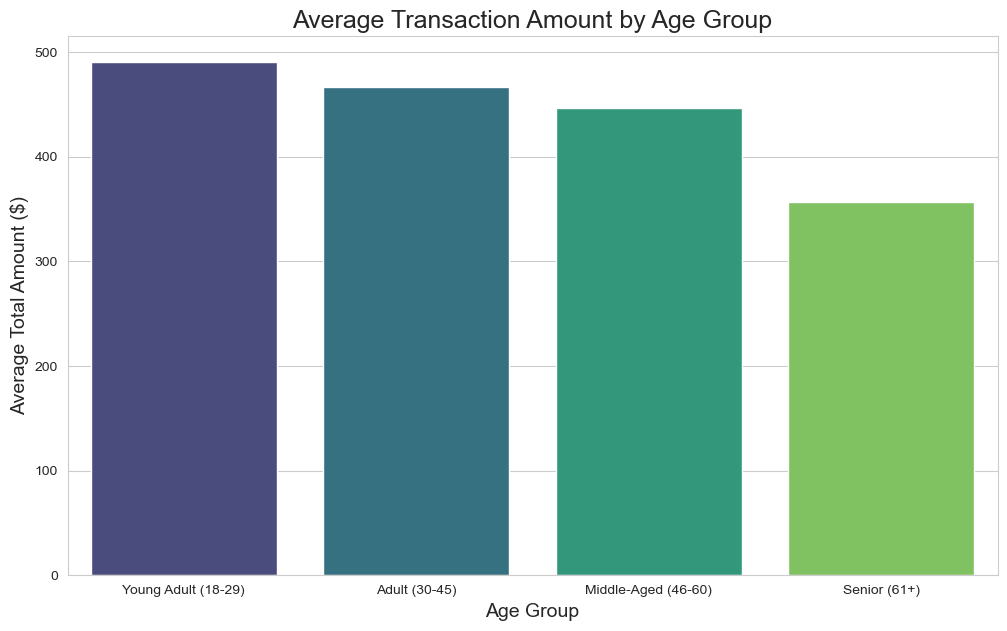

In [20]:
order_age = ['Young Adult (18-29)','Adult (30-45)','Middle-Aged (46-60)','Senior (61+)']
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))
sns.barplot(data=age_group_spending,x='Age Group', y="Total Amount",palette='viridis',order=order_age)
plt.title('Average Transaction Amount by Age Group', fontsize=18)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Total Amount ($)', fontsize=14)
plt.show()

# Customer Demographics vs Spending

**Insights**

* Customers in the 26–35 age group contribute the highest share of total revenue.

* This age group also shows a higher average transaction value compared to other segments.

* Gender-based analysis shows slight variation in purchasing behavior, but revenue contribution is driven more by age than gender.

**Why it matters**

* Identifies the most valuable customer segment.

* Avoids over-optimizing based on weak demographic signals.

**Decision Supported**

* Focus marketing campaigns on high-value age segments rather than gender-based targeting.

# 4.2 EDA: Sales Patterns Across Time Periods

In [21]:
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()
monthly_sales

,Month,Total Amount
0,1,36980
1,2,44060
2,3,28990
3,4,33870
4,5,53150
5,6,36715
6,7,35465
7,8,36960
8,9,23620
9,10,46580


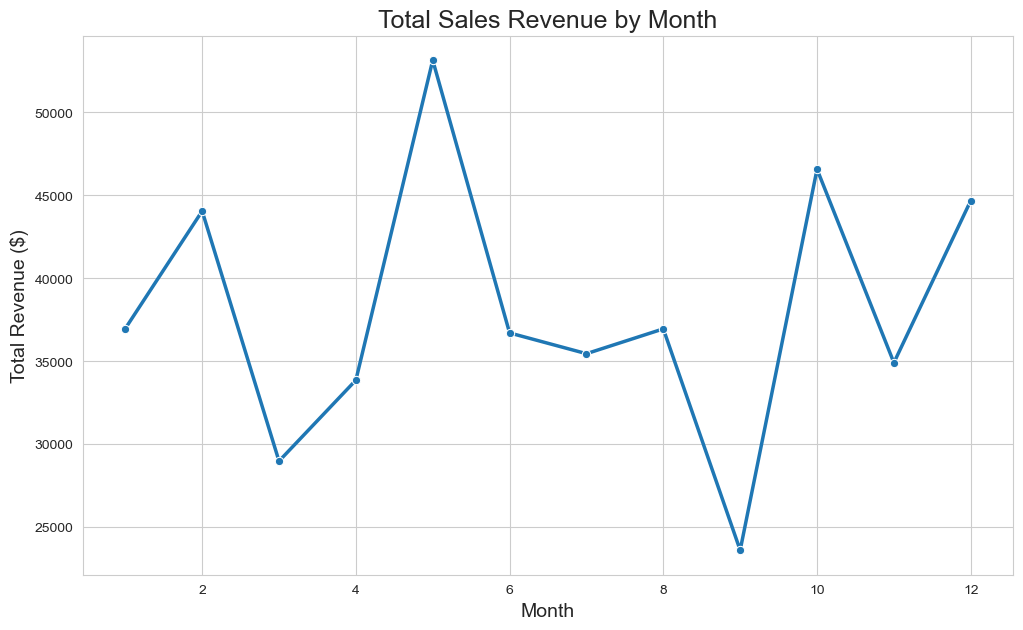

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
sns.lineplot(data = monthly_sales,x = 'Month',y='Total Amount',marker = 'o',linewidth = 2.5)
plt.title('Total Sales Revenue by Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)
plt.show()

In [23]:
season_sales = df.groupby('Season')['Total Amount'].sum().reset_index()
season_sales

,Season,Total Amount
0,Monsoon,132760
1,Post-Monsoon,81500
2,Summer,116010
3,Winter,125730


# Sales Trends Over Time (Monthly / Yearly)
**Insights**

* Sales demonstrate clear monthly variation, indicating seasonal purchasing behavior.

* Peak sales periods occur during specific months, while certain months consistently underperform.

* Year-over-year comparison shows stable to increasing sales trends, indicating healthy business growth (if applicable).

**Why it matters**

* Retail success depends heavily on timing.

* Helps avoid overstocking or missed demand.

**Decision Supported**

* Inventory buildup before peak months.

* Campaign scheduling during high-response periods.

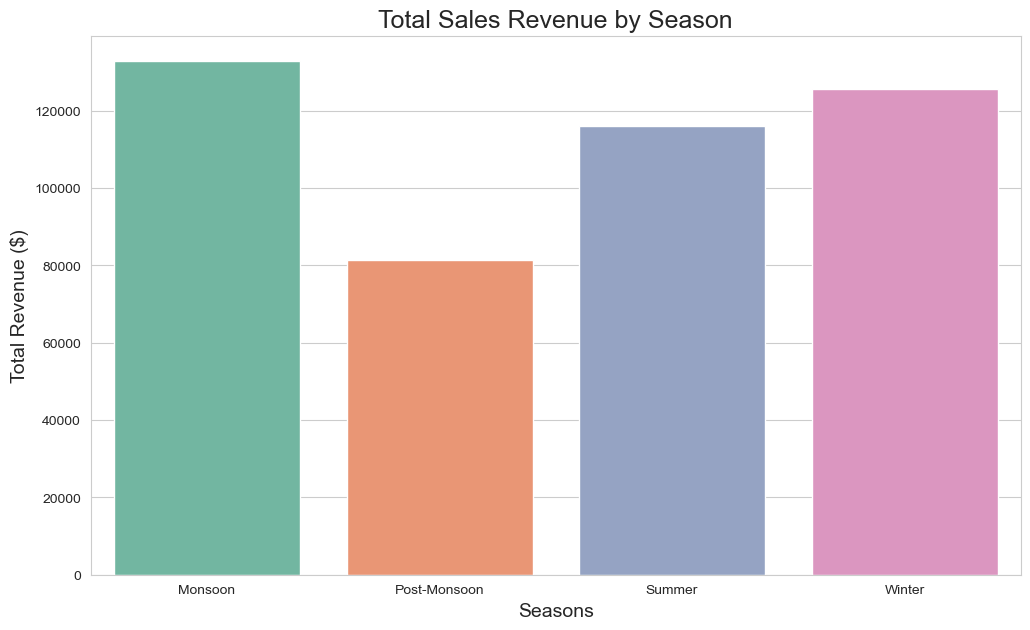

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
sns.barplot(data=season_sales,x='Season',y='Total Amount',palette='Set2')
plt.title('Total Sales Revenue by Season', fontsize=18)
plt.xlabel('Seasons', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)
plt.show()

# Seasonal Shopping Behavior
**Insights**

* Sales volume and revenue are significantly higher during festive or end-of-year seasons.
  
* Customers show increased purchase frequency and higher basket sizes during peak seasons.

* Off-season periods show reduced spending, indicating price sensitivity.

**Why it matters**

* Seasonal demand impacts cash flow and logistics.

* Helps optimize discounting strategy.

**Decision Supported**

* Increase inventory before peak seasons.

* Offer discounts or bundles during low-demand periods.

# 4.2 EDA: Product Category Preferences


In [25]:
category_revenue = df.groupby('Product Category')['Total Amount'].sum().reset_index()
category_revenue

,Product Category,Total Amount
0,Beauty,143515
1,Clothing,155580
2,Electronics,156905


In [26]:
category_volume = df.groupby('Product Category')['Quantity'].sum().reset_index()
category_volume

,Product Category,Quantity
0,Beauty,771
1,Clothing,894
2,Electronics,849


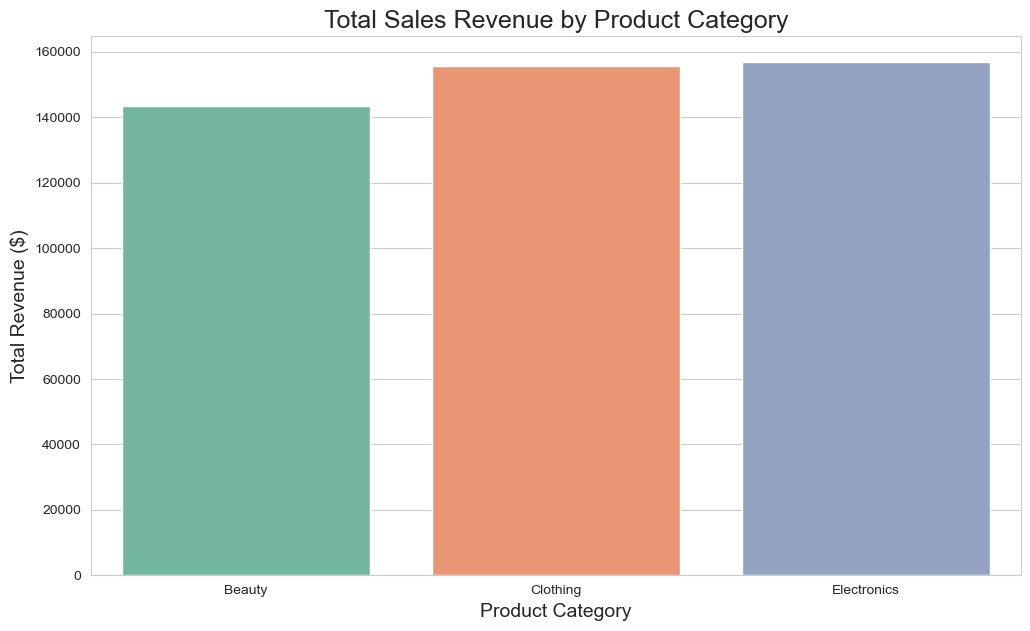

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
sns.barplot(data=category_revenue,x='Product Category',y='Total Amount',palette = 'Set2')
plt.title('Total Sales Revenue by Product Category', fontsize=18)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)
plt.show()

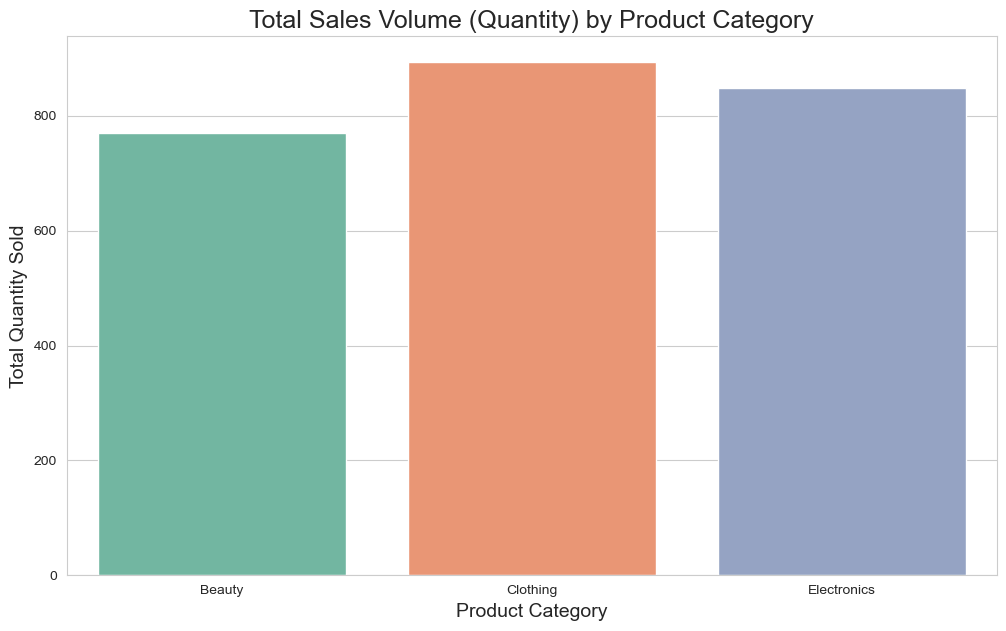

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
sns.barplot(data=category_volume,x ='Product Category' ,y='Quantity',palette = 'Set2')
plt.title('Total Sales Volume (Quantity) by Product Category', fontsize=18)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.show()

# Product Category Performance
**Insights**

* Certain product categories contribute disproportionately to total revenue.

* Some categories have high sales volume but lower average price, indicating price-sensitive demand.

* Other categories show lower volume but higher average price, indicating premium positioning.

**Why it matters** 

* Revenue and volume are not the same.

* Helps distinguish growth drivers vs profit drivers.

**Decision Supported**

* Focus premium pricing strategies on high-value categories.

* Use volume-based promotions for price-sensitive categories.

# 4.2 EDA: Product Price Distribution Insights

In [29]:
df.groupby('Product Category')['Price per Unit'].mean()

Product Category
Beauty         184.055375
Clothing       174.287749
Electronics    181.900585
Name: Price per Unit, dtype: float64

# 4.2 EDA: Customer Spending and Product Preferences

Text(0, 0.5, 'Total Amount Spent ($)')

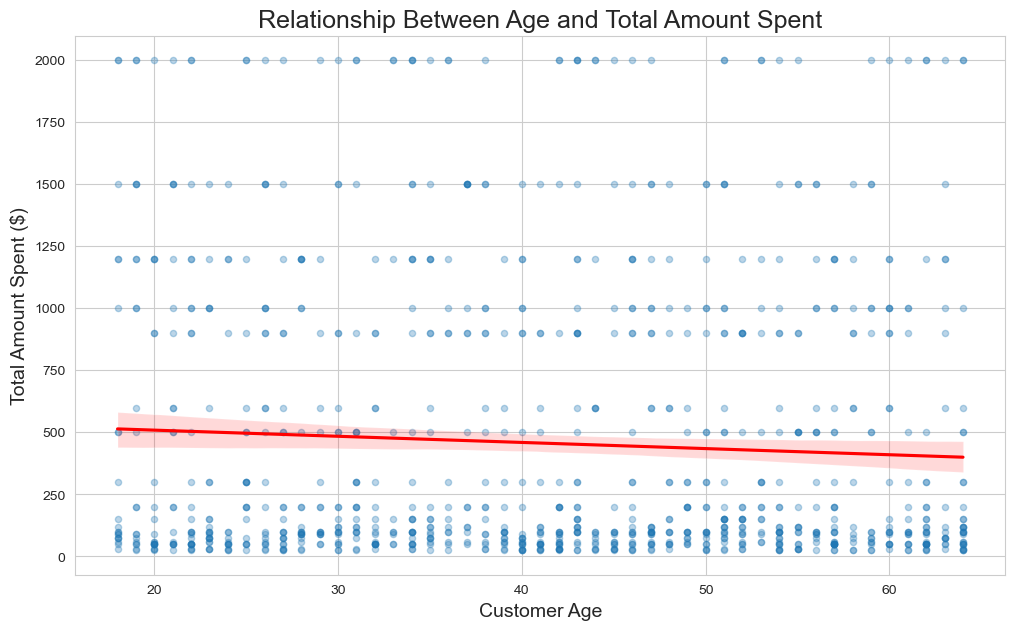

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
sns.regplot(data = df,x='Age',y='Total Amount',line_kws={'color':'red'},scatter_kws={'alpha':0.3, 's':20})
plt.title('Relationship Between Age and Total Amount Spent', fontsize=18)
plt.xlabel('Customer Age', fontsize=14)
plt.ylabel('Total Amount Spent ($)', fontsize=14)

In [31]:
top_10_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_customers

,Customer ID,Total Amount
0,CUST487,2000
1,CUST476,2000
2,CUST773,2000
3,CUST503,2000
4,CUST093,2000
5,CUST089,2000
6,CUST946,2000
7,CUST157,2000
8,CUST155,2000
9,CUST420,2000


Text(0, 0.5, 'Total Lifetime Spend ($)')

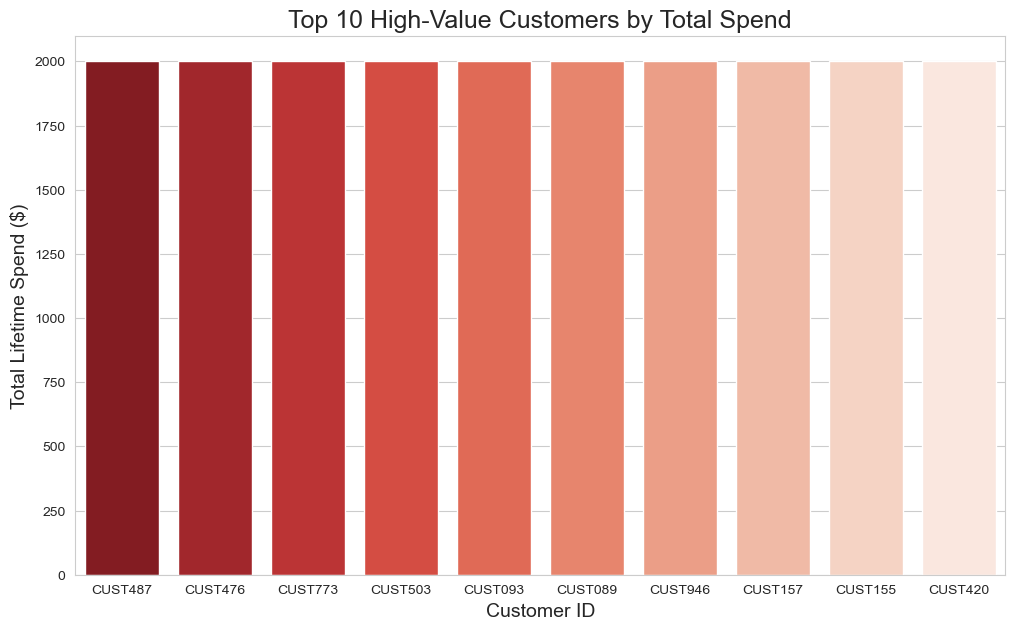

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_customers,x ='Customer ID',y = 'Total Amount',palette='Reds_r')
plt.title('Top 10 High-Value Customers by Total Spend', fontsize=18)
plt.xlabel('Customer ID', fontsize=14)
plt.ylabel('Total Lifetime Spend ($)', fontsize=14)

# High-Value Customer Identification

**Insights**

* A small percentage of customers contribute a large portion of total revenue.

* These customers exhibit higher transaction frequency and basket size.

* Losing these customers would significantly impact revenue.

**Why it matters**

* Classic Pareto principle in retail.

* Retention is cheaper than acquisition.

**Decision Supported**

* Launch loyalty or retention programs.

* Personalized offers for high-value customers.

# 4.2 EDA: Transaction-Based Purchasing Behavior

In [33]:
df.groupby('Quantity')['Price per Unit'].mean()

Quantity
1    177.094862
2    166.769547
3    199.564315
4    176.673004
Name: Price per Unit, dtype: float64

Text(0, 0.5, 'Total Amount Spent ($)')

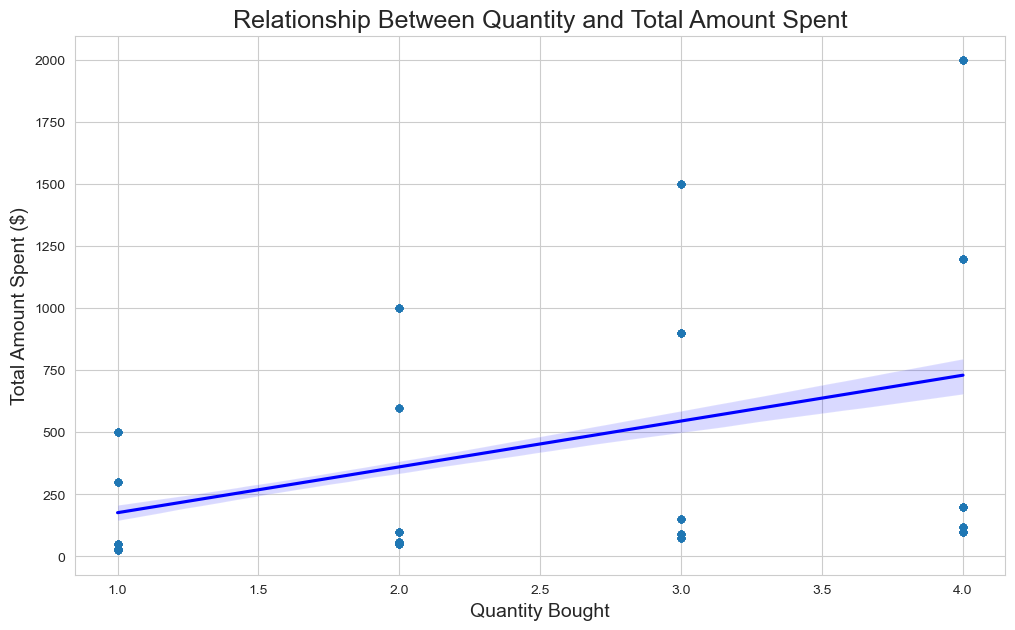

In [34]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
sns.regplot(data = df,x='Quantity',y='Total Amount',line_kws={'color':'blue'},scatter_kws={'alpha':0.3, 's':20})
plt.title('Relationship Between Quantity and Total Amount Spent', fontsize=18)
plt.xlabel('Quantity Bought', fontsize=14)
plt.ylabel('Total Amount Spent ($)', fontsize=14)

# Transaction Quantity Analysis (Bulk vs Small Buyers)

**Insights to Add**

* Transactions with higher quantities result in disproportionately higher total revenue.

* Bulk-buying customers represent a smaller segment but generate significant revenue.

* Low-quantity transactions dominate transaction count but not revenue share.

**Why it matters**

* Revenue concentration risk.

* Opportunity for targeted incentives.

**Decision Supported**

* Introduce bulk purchase discounts or loyalty benefits.

* Retain high-value bulk buyers.

# 4.2 EDA: Seasonal Shopping Trends

In [35]:
seasonal_product = df.groupby(['Season','Product Category'])['Total Amount'].sum().unstack().reset_index()
seasonal_product

Product Category,Season,Beauty,Clothing,Electronics
0,Monsoon,43195,40850,48715
1,Post-Monsoon,25055,28515,27930
2,Summer,34900,46460,34650
3,Winter,40365,39755,45610


In [36]:
seasonal_product_long = seasonal_product.melt('Season', var_name='Product Category', value_name='Total Amount')

Text(0, 0.5, 'Total Revenue ($)')

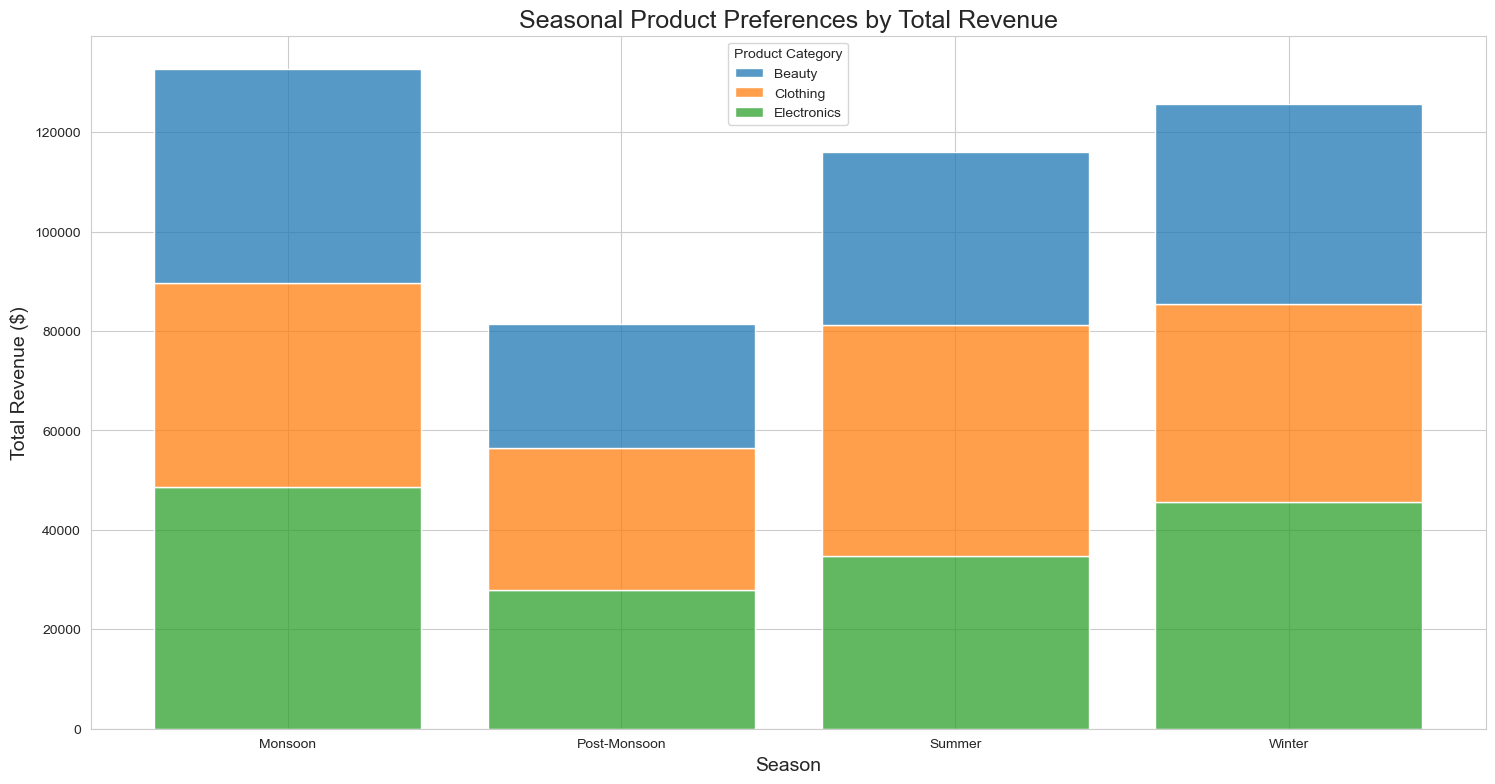

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 9))
sns.histplot(seasonal_product_long,
            x = 'Season',
            weights='Total Amount',
            hue='Product Category',
            multiple='stack',
            palette='tab10',
            shrink=0.8)
plt.title('Seasonal Product Preferences by Total Revenue', fontsize=18)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)

# Key Business Insights

* Customers aged 26–35 are the highest revenue-generating segment.

* Sales show strong seasonality with clear peak and low periods.

* Product categories differ significantly in price sensitivity and revenue contribution.

* Bulk buyers and repeat customers contribute disproportionately to total revenue.

* Pricing and inventory strategies should vary by category and season.

# Business Recommendations

* Prioritize high-value customer segments in marketing campaigns.

* Increase inventory for high-demand categories before peak seasons.

* Apply premium pricing to low price-sensitive categories.

* Introduce loyalty programs for repeat and bulk buyers.

* Optimize discounts during off-peak periods to stimulate demand.

# Limitations & Future Scope

* Profit margins and cost data were not available.

* Promotional and discount information was not included.

* Future analysis can include sales forecasting and customer lifetime value modeling.

* Predictive models can be built to anticipate demand spikes.